In [1]:
using Distributions
using LaTeXStrings
using StatsFuns
using StatsPlots
default(fmt=:png, legendfonthalign=:left, legendfontsize=12, guidefontsize=12, fontfamily="ipamp")
pgfplotsx()
PGFPlotsX.CUSTOM_PREAMBLE = [raw"\usepackage{luatexja}"]
@eval Plots pgfx_sanitize_string(s::AbstractString) = s
gr()
using SymPy

@syms k n p χ
Eq(χ^2, (k - n*p)^2/(n*p) + ((n-k) - n*(1-p))^2/(n*(1-p)) |> expand |> factor) |> display

safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_bin_score(k, n, p)
    χ² = safediv((k - n*p)^2, n*p*(1-p))
    ccdf(Chisq(1), χ²)
end

function pvalue_bin_llr(k, n, p)
    χ² = 2(
        (xlogy(k, k/n) + xlogy(n-k, 1-k/n)) -
        (xlogy(k, p) + xlogy(n-k, 1-p))
    )
    ccdf(Chisq(1), χ²)
end

pvalue_bin_llr_firth(k, n, p) = pvalue_bin_llr(k+1/2, n+1, p)

function expectval(f, dist::DiscreteUnivariateDistribution)
    μ, σ = mean(dist), std(dist)
    xmin = max(minimum(dist), round(Int, μ-5σ))
    xmax = min(maximum(dist), round(Int, μ+5σ))
    sum(f(x)*pdf(dist, x) for x in xmin:xmax)
end

function prob_rej_bin(pvaluefunc, n, p₀, p₁=p₀; α=0.05)
    bin = Binomial(n, p₁)
    expectval(x -> pvaluefunc(x, n, p₀) < α, bin)
end

function plot_alpha_error_rates_n(p; ns=1:100, α=0.05, f=Bool[1,1,1], kwargs...)
    nns = length(ns)
    pval_score = zeros(nns)
    pval_llr = zeros(nns)
    pval_firth = zeros(nns)
    for (i, n) in enumerate(ns)
        pval_score[i] = prob_rej_bin(pvalue_bin_score, n, p; α)
        pval_llr[i] = prob_rej_bin(pvalue_bin_llr, n, p; α)
        pval_firth[i] = prob_rej_bin(pvalue_bin_llr_firth, n, p; α)
    end
    plot()
    f[1] && plot!(ns, pval_score; label="スコア検定 (二項分布の正規分布近似)", marker=:circle, ms=3, msc=:auto, ma=0.5, c=1)
    f[2] && plot!(ns, pval_firth; label="対数最大尤度比検定 (Firth補正)", ls=:dash, marker=:diamond, ms=3.5, msc=:auto, ma=0.5, c=2)
    f[3] && plot!(ns, pval_llr; label="対数最大尤度比検定", ls=:dashdot, marker=:utriangle, ms=3.5, msc=:auto, ma=0.5, c=3)
    hline!([α]; label="", c=:black, ls=:dot)
    plot!(xguide=L"標本サイズ $n$")
    plot!(ytick=0:0.01:1)
    plot!(legend=:topright)
    title!(L"$p = %$p$, $\alpha = %$(100α)\% $ の場合の$\alpha$エラー率")
    plot!(; kwargs...)
end

                2 
 2   -(-k + n*p)  
χ  = -------------
      n*p*(p - 1) 

plot_alpha_error_rates_n (generic function with 1 method)

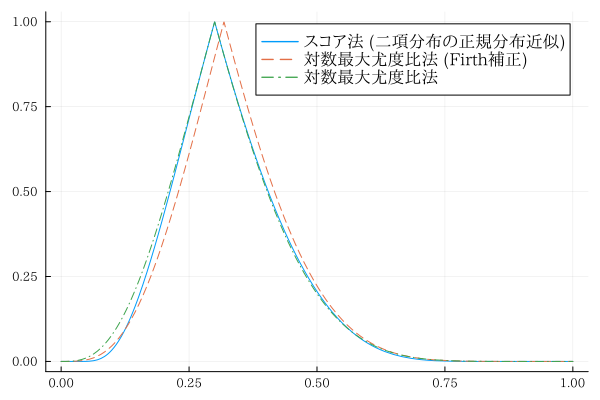

In [2]:
plot(p -> pvalue_bin_score(3, 10, p), 0, 1; label="スコア法 (二項分布の正規分布近似)")
plot!(p -> pvalue_bin_llr_firth(3, 10, p), 0, 1; label="対数最大尤度比法 (Firth補正)", ls=:dash)
plot!(p -> pvalue_bin_llr(3, 10, p), 0, 1; label="対数最大尤度比法", ls=:dashdot)
plot!(legendfontsize=11)

In [3]:
pgfplotsx()
#gr()

Plots.PGFPlotsXBackend()

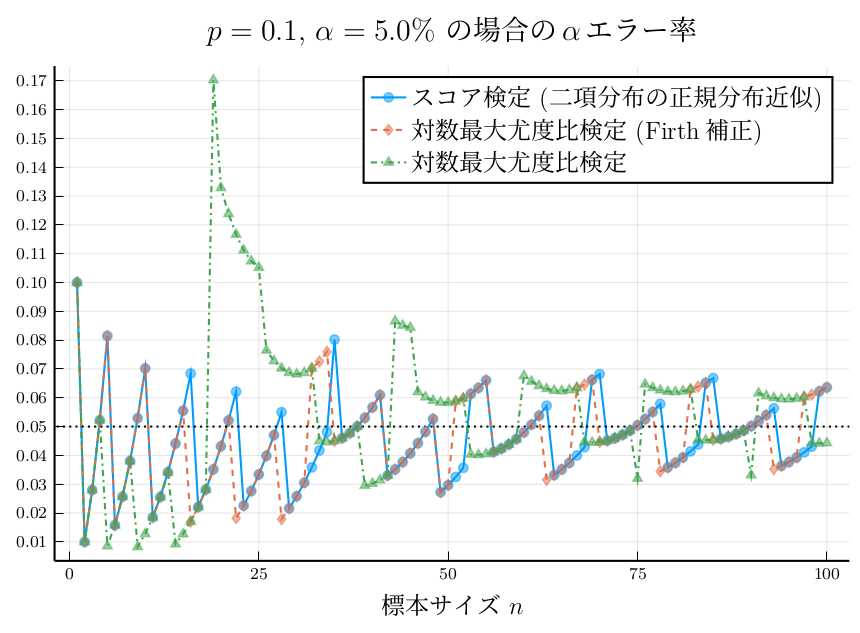

In [4]:
plot_alpha_error_rates_n(0.1; ns=1:100)

https://x.com/kakira9618/status/1893919806849483074

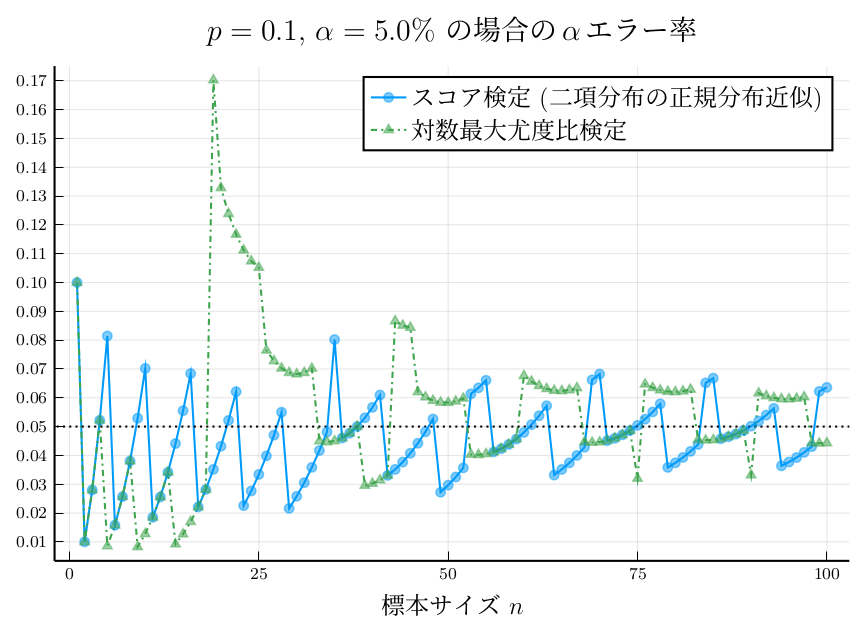

In [5]:
plot_alpha_error_rates_n(0.1; ns=1:100, f=Bool[1,0,1])

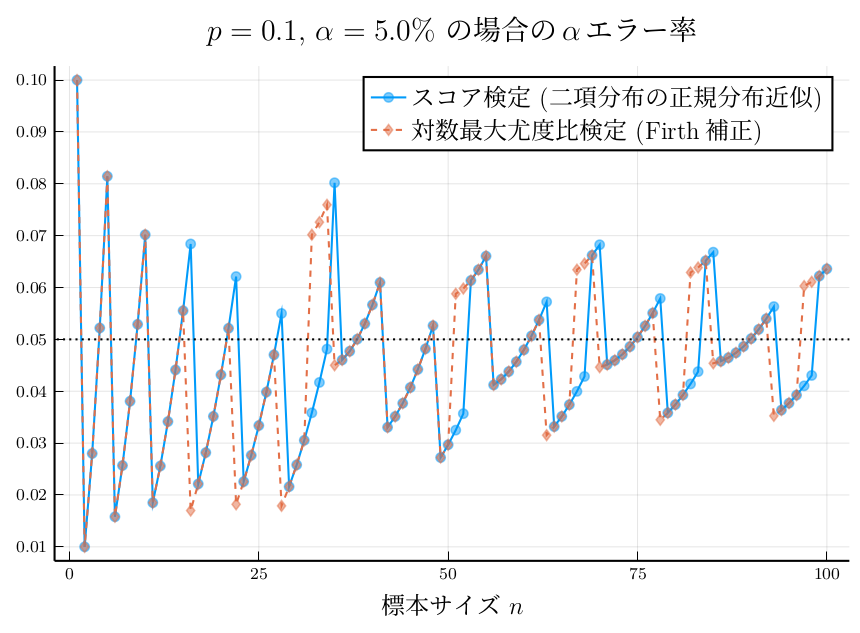

In [6]:
plot_alpha_error_rates_n(0.1; ns=1:100, f=Bool[1,1,0])

In [7]:
gr()

Plots.GRBackend()

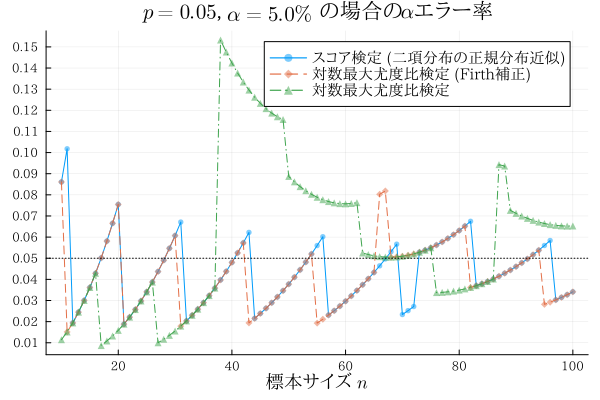

In [8]:
plot_alpha_error_rates_n(0.05; ns=10:100, legendfontsize=10)

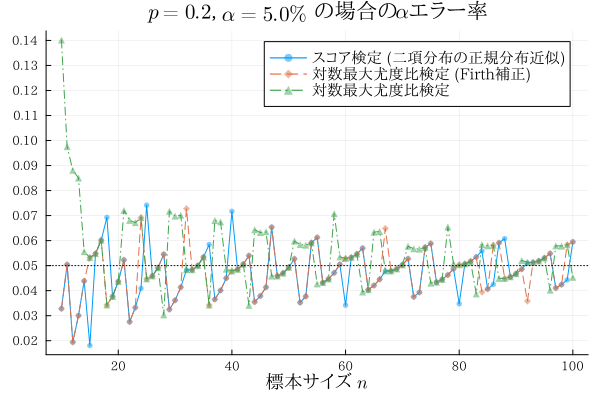

In [9]:
plot_alpha_error_rates_n(0.2; ns=10:100, legendfontsize=10)

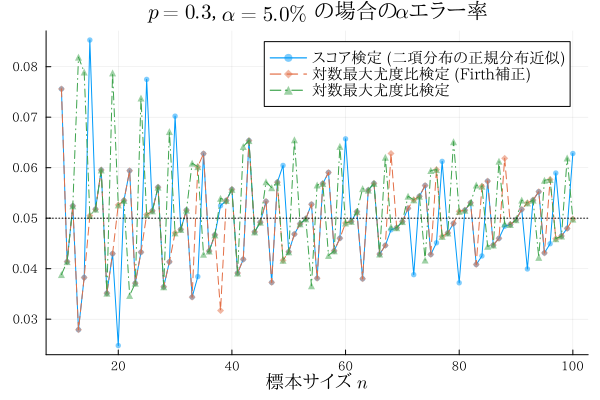

In [10]:
plot_alpha_error_rates_n(0.3; ns=10:100, legendfontsize=10)

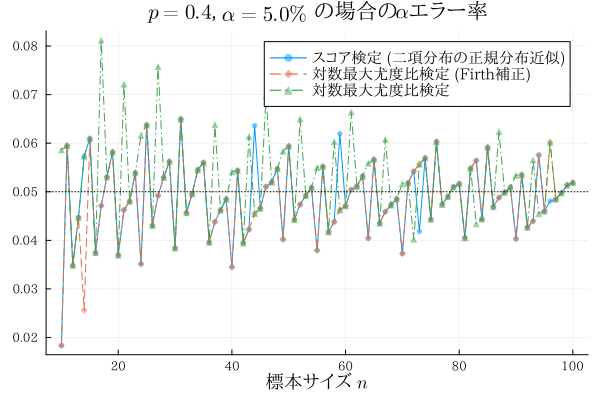

In [11]:
plot_alpha_error_rates_n(0.4; ns=10:100, legendfontsize=10)